In [1]:
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

import os,time
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
plt.rcParams.update({'font.size': 16})
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DMfit/DMfit")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/PDFs")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Spectra")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DetResponse")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Utils")

from Detector import *
from Signal import *
from Background import *
from NuSpectra import *
from Jfactor import *

from modeling import PdfBase, Model, Parameter
from data import DataSet
from llh import LikelihoodRatioTest
#Change the resolution of the plots
plt.rcParams['figure.dpi']= 200

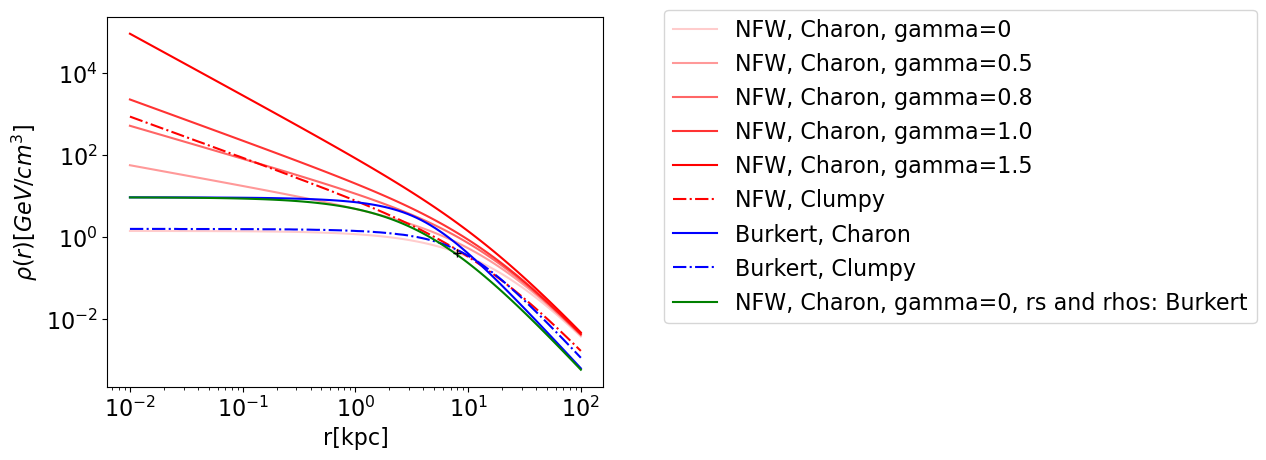

In [16]:
# Density from charon and clumpy
process = "ann"
profile = ["NFW", "Burkert"]
# Create Jfactor object
MyJ = Jf(process)
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}

r = np.logspace(-2,2,100)
# Plot:
# rs = {"NFW":24.42, "Burkert":12.67}
# rhos = {"NFW":0.184, "Burkert":0.712}
# rs = {"NFW":12, "Burkert":12.67}
# rhos = {"NFW":0.42, "Burkert":0.712}

rs = {"NFW":16.1, "Burkert":4.13}
rhos = {"NFW":1.4, "Burkert":9.26}

for pr in profile:
    MyJ.profile = pr
    P_Clumpy = MyJ.profile_Clumpy()
    if pr=='NFW':
        i=1
        for g in [0, 0.5, 0.8, 1., 1.5]:
            P_Charon = MyJ.profile_Charon(r, rs=rs[pr], rhos=rhos[pr], gamma=g)
            plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon, gamma={}'.format(pr, g), alpha=i/5.)
            i+=1
    else:
        P_Charon = MyJ.profile_Charon(r, rs=rs[pr], rhos=rhos[pr])
        plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon'.format(pr))
        
    plt.plot(P_Clumpy["r"], P_Clumpy["rho"], color=colors[pr], label='{}, Clumpy'.format(pr), linestyle='-.')
MyJ.profile = 'NFW'
P_Charon = MyJ.profile_Charon(r, rs=rs['Burkert'], rhos=rhos['Burkert'], gamma=0)
plt.plot(P_Charon["r"], P_Charon["rho"], color='green', label='NFW, Charon, gamma=0, rs and rhos: Burkert')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('r[kpc]')
plt.ylabel(r'$\rho(r)[GeV/cm^{3}]$')
plt.plot(8, 0.4, marker='+', color='black')

plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.legend()

In [ ]:
# Density from charon and clumpy
process = "ann"
profile = ["NFW", "Burkert"]
# Create Jfactor object
MyJ = Jf(process)
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}

r = np.logspace(-2,2,100)
# Plot:
# rs = {"NFW":24.42, "Burkert":12.67}
# rhos = {"NFW":0.184, "Burkert":0.712}
# rs = {"NFW":12, "Burkert":12.67}
# rhos = {"NFW":0.42, "Burkert":0.712}

rs = {"NFW":16.1, "Burkert":4.13}
rhos = {"NFW":1.4, "Burkert":9.26}

for pr in profile:
    MyJ.profile = pr
    P_Clumpy = MyJ.profile_Clumpy()
    if pr=='NFW':
        i=1
        for g in [0, 0.5, 0.8, 1., 1.5]:
            P_Charon = MyJ.profile_Charon(r, rs=rs[pr], rhos=rhos[pr], gamma=g)
            plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon, gamma={}'.format(pr, g), alpha=i/5.)
            i+=1
    else:
        P_Charon = MyJ.profile_Charon(r, rs=rs[pr], rhos=rhos[pr])
        plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon'.format(pr))
        
    plt.plot(P_Clumpy["r"], P_Clumpy["rho"], color=colors[pr], label='{}, Clumpy'.format(pr), linestyle='-.')
MyJ.profile = 'NFW'
P_Charon = MyJ.profile_Charon(r, rs=rs['Burkert'], rhos=rhos['Burkert'], gamma=0)
plt.plot(P_Charon["r"], P_Charon["rho"], color='green', label='NFW, Charon, gamma=0, rs and rhos: Burkert')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('r[kpc]')
plt.ylabel(r'$\rho(r)[GeV/cm^{3}]$')
plt.plot(8, 0.4, marker='+', color='black')

plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.legend()

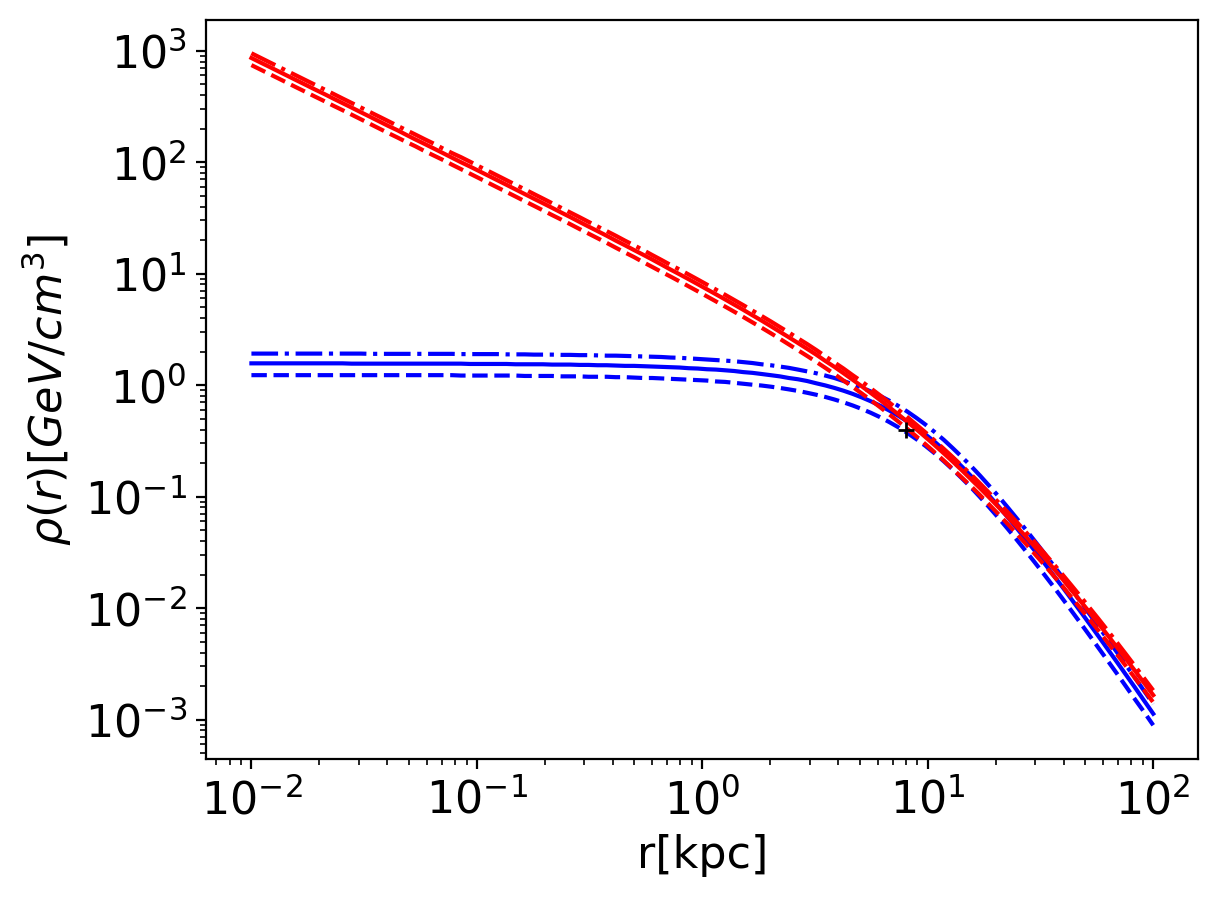

In [2]:
# Density from Clumpy:
psi = np.linspace(0.,180,80)
profile=["Burkert", "NFW"]
error=["errors1", "errors2"]
MyJ = Jf('ann')
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}
ls = {"errors1":'-.', "errors2":'--'}
for pr in profile:
    MyJ.profile = pr
    J_Clumpy = MyJ.profile_Clumpy()
    plt.plot(J_Clumpy["r"], J_Clumpy["rho"], color=colors[pr], label=f'Clumpy - {pr}, nominal')
    for e in error:        
        J_Clumpy = MyJ.profile_Clumpy(errors=e)
        plt.plot(J_Clumpy["r"], J_Clumpy["rho"], color=colors[pr], label=f'Clumpy - {pr}, {e}', linestyle=ls[e])


    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r[kpc]')
plt.ylabel(r'$\rho(r)[GeV/cm^{3}]$')
plt.plot(8, 0.4, marker='+', color='black')

# plt.legend(bbox_to_anchor=(1.1, 1.05))

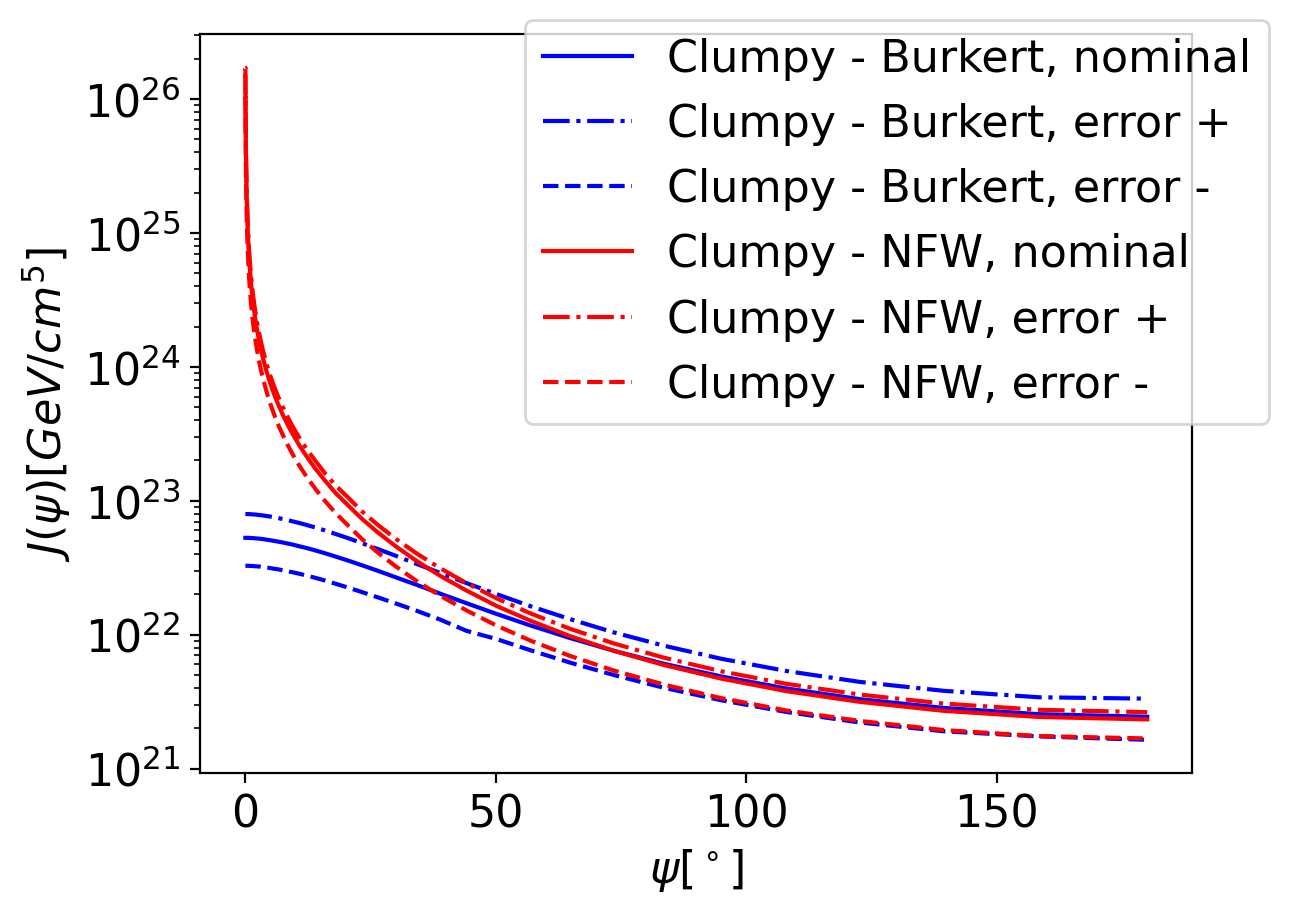

In [3]:
# Jfactor from Clumpy:
psi = np.linspace(0.,180,80)
profile=["Burkert", "NFW"]
error=["errors1", "errors2"]
MyJ = Jf('ann')
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}
ls = {"errors1":'-.', "errors2":'--'}
lb = {"errors1":'error +', "errors2":'error -'}

for pr in profile:
    MyJ.profile = pr
    J_Clumpy = MyJ.Jfactor_Clumpy()
    plt.plot(J_Clumpy["psi"], J_Clumpy["J"], color=colors[pr], label=f'Clumpy - {pr}, nominal')
    for e in error:        
        J_Clumpy = MyJ.Jfactor_Clumpy(errors=e)
        plt.plot(J_Clumpy["psi"], J_Clumpy["J"], color=colors[pr], label=f'Clumpy - {pr}, {lb[e]}', linestyle=ls[e])


    
# plt.yscale('log')
plt.semilogy()
plt.xlabel(r'$\psi[^\circ]$')
plt.ylabel(r'$J(\psi)[GeV/cm^{5}]$')
plt.legend(bbox_to_anchor=(1.1, 1.05))

# <font color="darkmagenta"> Do a llh scan for different profile parameter  </font>

In [18]:
# First Create the PDFs
channel = 'WW'
mc = '1122'
pr = 'NFW'
mass = 100
Bin = Std_Binning(mass, N_Etrue=300)
Reco = RecoRate(channel, mass, 'NFW', Bin, type="Resp", spectra='Charon', set=mc, Scramble=False)
Reco_Scr = RecoRate(channel, mass, 'NFW', Bin, type="Resp", spectra='Charon', set=mc, Scramble=True)

Reco.ComputeResp()
Reco_Scr.ComputeResp()


Bkg = ScrambleBkg(Bin, bw="ISJ", oversample=10)


********************
Computing Response Matrix
********************
Accessing MC set 1122
********************
Computing Response Matrix
********************
Accessing MC set 1122
Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/p

In [19]:
psi = Bin['true_psi_center']
rs = {"NFW":24.42, "Burkert":12.67}
rhos = {"NFW":0.184, "Burkert":0.712}

BkgPDF = PdfBase(Bkg.flatten()/np.sum(Bkg.flatten()), name="Bkg")
sig_fit = Parameter(value=0.001, limits=(0,1), fixed=False, name="fit")
sig_fix = Parameter(value=0.0, limits=(0,1), fixed=True, name="fix")
sig_inj = Parameter(value=0.005, limits=(0,1), fixed=True, name="inj")

BurnSample = DataHist(Bin)

BkgPDF = PdfBase(Bkg.flatten()/np.sum(Bkg.flatten()), name="Bkg")

# Create Jfactor object
MyJ = Jf('ann')
MyJ.profile = pr
J_Clumpy = MyJ.Jfactor_Clumpy()
J_Charon = MyJ.Jfactor_Charon(psi,rs=rs[pr], rhos=rhos[pr])
LLH = np.array([])
for g in np.linspace(1, 1.5, 10):
    J_Charon = MyJ.Jfactor_Charon(psi,rs=rs[pr], rhos=rhos[pr], gamma=g)
    Reco.hist['Jfactor'] = np.array(J_Charon["J"])
    Rate = Reco.ComputeRecoRate()
    Rate_Scr = Reco_Scr.ComputeRecoRate()
    SignalPDF = PdfBase(Rate.flatten()/np.sum(Rate.flatten()), name="SignalPDF")
    ScrSignalPDF = PdfBase(Rate_Scr.flatten()/np.sum(Rate_Scr.flatten()), name="ScrSignalPDF")
    # signal subtraction
    # if LLH=="SignalSub":
    modelH1 = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF) + sig_fit* BkgPDF - sig_fit*ScrSignalPDF
    modelH0 = (sig_fix* SignalPDF) + (1-sig_fix)*(BkgPDF) + sig_fix* BkgPDF - sig_fix*ScrSignalPDF
    # elif LLH=="Poisson":
    # # # in case of normal likelihood:
    #     modelH1 = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF)
    #     modelH0 = (sig_fix* SignalPDF) + (1-sig_fix)*(BkgPDF)

    lr = LikelihoodRatioTest(model = modelH1, null_model = modelH0)
    # pseudo_data = (sig_inj* SignalPDF) + (1-sig_inj)*(BkgPDF) + sig_inj* BkgPDF - sig_inj*ScrSignalPDF
    data = DataSet()
    DataPDF = (sig_inj* ScrSignalPDF) + (1-sig_inj)*(BkgPDF)

    data.asimov(10*np.sum(BurnSample), DataPDF)
    lr.data = data
    lr.fit("H0")
    lr.fit("H1")
    LLH = np.append(LLH, lr.TS)


Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: WW || mass: 100 || profile: NFW || process: ann

Spectra already computed, will not compute it again
Jfactor already computed, will not compute it again
********************
Computing Response Matrix
Response Matrix already computed, will not compute it again
********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: WW || mass: 100 || profile: NFW || process: ann

Spectra already computed, will not compute it again
Jfactor already computed, will not compute it again
********************
Computing Response Matrix
Response Matrix already computed, will not compute it again
Parameter fit already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter fit already exists in the model, it won't be added again
Parameter fit alrea

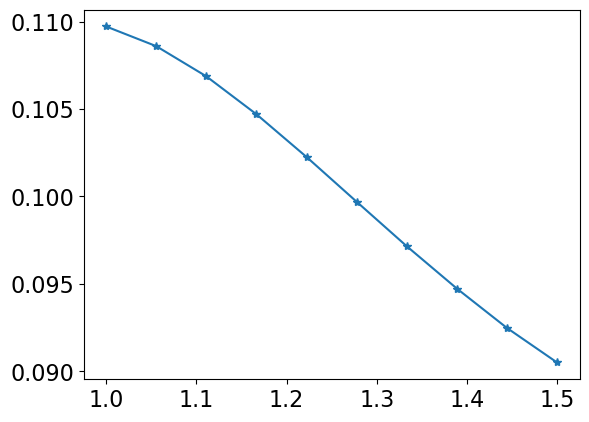

In [21]:
plt.plot(np.linspace(1, 1.5, 10), LLH, marker='*')